# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score,\
f1_score, roc_auc_score ,classification_report

# Load the Dataset and make EDA

- Print the head, tail, describe, info, shape.

In [2]:
df = pd.read_csv('soil_measures.csv')

In [3]:
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [4]:
df.tail()

,N,P,K,ph,crop
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee
2199,104,18,30,6.779833,coffee


In [5]:
df.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [7]:
df.shape

(2200, 5)

# Check the number of classes in the target label

In [8]:
df['crop'].value_counts() #22 class

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

# Check is there missing data

In [9]:
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

# Train test split

- Test size is 20%

In [6]:
X = df.drop('crop', axis=1)
Y = df['crop']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a multiclass logistic regression model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\dalal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = logreg.predict(X_test)

In [13]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred,average='weighted')
f1 = f1_score(Y_test, y_pred,average='weighted')
conf_matrix = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

In [14]:
print('The accuracy of the model :' , accuracy)
print('The precision of the model :' , precision)
print('The recall of the model :' ,recall )
print('The f1 score of the model :' ,f1 )
print('The confusion matrix :\n' ,conf_matrix )
print('The classification report :\n' ,report )

The accuracy of the model : 0.5681818181818182
The precision of the model : 0.5658736017236404
The recall of the model : 0.5681818181818182
The f1 score of the model : 0.5454206655375167
The confusion matrix :
 [[ 4  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  1  7  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0 10  0  0  0  0  0  0 11  0  1]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0  8  0  0  0  0  0  0  0  0  2  0  0 10  0]
 [ 0  0  3  0  0  0  0  0  0  5  4  0  0  0  1  0  0  0  7  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  6  0  0  1  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  5  0  1  

# Train a SVM model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [15]:
model =svm.SVC(C= 100, kernel='linear')
model.fit(X_train,Y_train)
pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred, average='weighted')
recall = recall_score(Y_test, pred,average='weighted')
f1 = f1_score(Y_test, pred,average='weighted')
conf_matrix = confusion_matrix(Y_test, pred)
report = classification_report(Y_test, pred)

print('The accuracy of the model :' , accuracy)
print('The precision of the model :' , precision)
print('The recall of the model :' ,recall )
print('The f1 score of the model :' ,f1 )
print('The confusion matrix :\n' ,conf_matrix )
print('The classification report :\n' ,report )

The accuracy of the model : 0.6954545454545454
The precision of the model : 0.7068635973984293
The recall of the model : 0.6954545454545454
The f1 score of the model : 0.6799267936410356
The confusion matrix :
 [[ 2  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  7  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  7  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0 13  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  1  0  0  0  0  5  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  

# Train a Decision tree model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [17]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
y_prediction = classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, y_prediction)
precision = precision_score(Y_test, y_prediction, average='weighted')
recall = recall_score(Y_test, y_prediction,average='weighted')
f1 = f1_score(Y_test, y_prediction,average='weighted')
conf_matrix = confusion_matrix(Y_test, y_prediction)
report = classification_report(Y_test, y_prediction)

print('The accuracy of the model :' , accuracy)
print('The precision of the model :' , precision)
print('The recall of the model :' ,recall )
print('The f1 score of the model :' ,f1 )
print('The confusion matrix :\n' ,conf_matrix )
print('The classification report :\n' ,report )

The accuracy of the model : 0.7636363636363637
The precision of the model : 0.7757770441647484
The recall of the model : 0.7636363636363637
The f1 score of the model : 0.766841901203475
The confusion matrix :
 [[12  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  3  0  0  1  0  0  0  0  2  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 13  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 14  1  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  5  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0

# Train a Decision tree model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [19]:
#random forest
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [20]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average="weighted")
recall = recall_score(Y_test, y_pred,average="weighted")
f1_score = f1_score(Y_test, y_pred,average="weighted")
confusion_matrix = confusion_matrix(Y_test, y_pred)
classification_report = classification_report(Y_test, y_pred)

print(f'The accuracy of the model :{accuracy}')
print(f'The precision of the model :{precision}')
print(f'The recall of the model : {recall}')
print(f'The f1 score of the model : {f1_score} ')
print(f'The confusion matrix : \n{confusion_matrix}')
print(f'The classification report : \n{classification_report}')

The accuracy of the model :0.8068181818181818
The precision of the model :0.8133820724712837
The recall of the model : 0.8068181818181818
The f1 score of the model : 0.804870677379972 
The confusion matrix : 
[[15  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 13  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 

# Train a default KNN model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

In [8]:
accuracy = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred, average="weighted")
recall = recall_score(Y_test, pred,average="weighted")
fscore = f1_score(Y_test, pred,average="weighted")
confu_mat = confusion_matrix(Y_test, pred)
class_report = classification_report(Y_test, pred)

print(f'The accuracy of the model :{accuracy}')
print(f'The precision of the model :{precision}')
print(f'The recall of the model : {recall}')
print(f'The f1 score of the model : {fscore} ')
print(f'The confusion matrix : \n{confu_mat}')
print(f'The classification report : \n{class_report}')

The accuracy of the model :0.634090909090909
The precision of the model :0.6477330814122082
The recall of the model : 0.634090909090909
The f1 score of the model : 0.6369163550933866 
The confusion matrix : 
[[ 9  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  3  4  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  8  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 15  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 15  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  4  0  0  0  0  0  0  3  7  0  0  2  1  0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  3  0  0  0  1  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  

# Try different values of K in the KNN model and select the best one.

- Based on the accuracy.

In [23]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

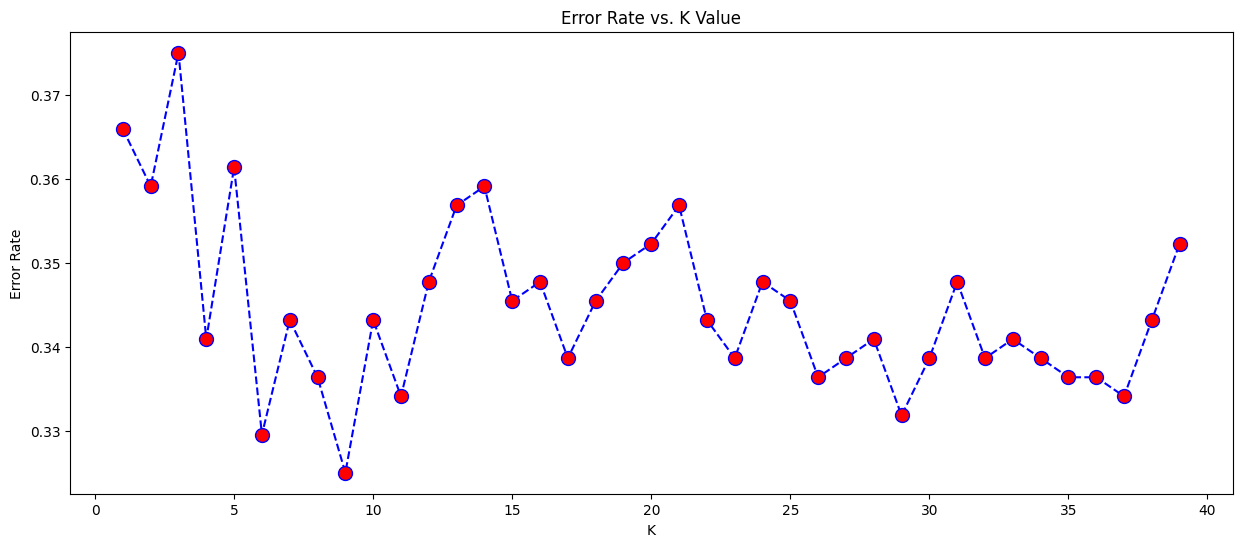

In [24]:
plt.figure(figsize=(15,6))
plt.plot(
    range(1,40),error_rate,color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred_y = knn.predict(X_test)

In [26]:
accuracy = accuracy_score(Y_test, pred_y)
print(f'The accuracy of the model :{accuracy}')

The accuracy of the model :0.625


In [27]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
pred_y = knn.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
print(f'The accuracy of the model :{accuracy}')

The accuracy of the model :0.6704545454545454


In [28]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
pred_y = knn.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
print(f'The accuracy of the model :{accuracy}')

The accuracy of the model :0.675


In [29]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,Y_train)
pred_y = knn.predict(X_test)
accuracy = accuracy_score(Y_test, pred_y)
print(f'The accuracy of the model :{accuracy}')

The accuracy of the model :0.6636363636363637


In [ ]:
# the best value of k is 9 , because it is the highest accuracy